In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [13]:
x=dataset.iloc[:,[3,4]].values

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x= sc.fit_transform(x)

C:\Anaconda\envs\aiml\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


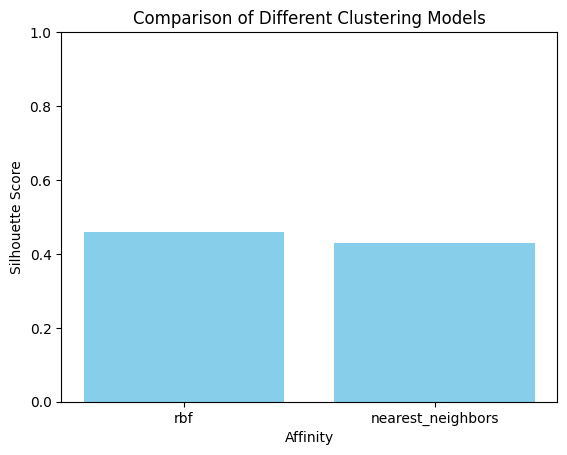

In [18]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

# Step 2: Affinity options
affinity_options = ['rbf', 'nearest_neighbors']
silhouette_scores = []

# Step 3: Clustering and silhouette score evaluation
for affinity in affinity_options:
    try:
        model = SpectralClustering(n_clusters=3, affinity=affinity, random_state=42)
        labels = model.fit_predict(x)
        score = silhouette_score(x, labels)
        silhouette_scores.append(score)
    except Exception as e:
        print(f"Error with affinity={affinity}: {e}")
        silhouette_scores.append(np.nan)

# Step 4: Plot results
plt.bar(affinity_options, silhouette_scores, color='skyblue')
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Different Clustering Models')
plt.ylim(0,1)
plt.show()

In [19]:
silhouette_scores

[0.4575984890332745, 0.4289163139775711]

In [41]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(eigen_solver=None,n_components=None,affinity='rbf',eigen_tol='auto',assign_labels='kmeans')
labels=sc.fit_predict(x) 

In [42]:
labels

array([1, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 1, 0, 1, 0,
       4, 0, 4, 0, 1, 1, 1, 0, 4, 0, 4, 0, 4, 0, 4, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 6, 1, 6, 7, 6, 7, 6,
       1, 1, 7, 6, 7, 6, 7, 6, 7, 6, 1, 6, 7, 6, 1, 6, 7, 6, 7, 6, 7, 6,
       7, 6, 7, 6, 7, 6, 1, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6,
       7, 6, 7, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 3, 2, 3, 2,
       3, 2])

In [43]:
supervised=dataset
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,5
2,3,Female,20,16,6,3
3,4,Female,23,16,77,5
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


In [44]:
supervised['Cluster_group']=labels
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,3
197,198,Male,32,126,74,2
198,199,Male,32,137,18,3


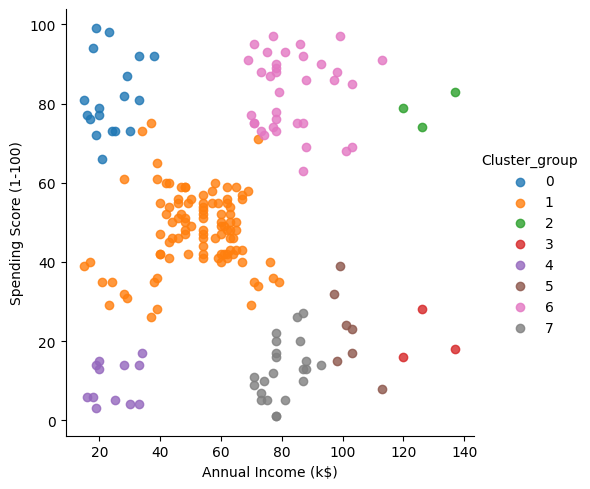

In [45]:
#seaborn use to draw plot graphical purpose
import seaborn as sns
#hue to get the color in the plot
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],
                  fit_reg=False,legend=True,facet_kws={'legend_out':True})